**IMPORT STATEMENTS**

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(5)
import random
import pandas as pd
import pickle

**ORIGINAL MODEL** 
1. .h5 file calling
2. attack vector generation and implemtation on        original .h5 file
3. plotting  of the results
4. saving the attack vectors in pickle format






1/1 [==============================] - 0s 82ms/step - loss: 0.0189 - accuracy: 0.9915


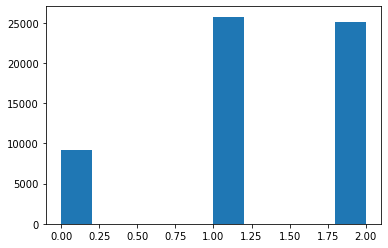

10

In [32]:
# load the model
model=tf.keras.models.load_model("models\Original Model/original.h5")
loss, acc = model.evaluate(test_data_batch)

# Generating the attack vectors
av1=np.random.randn(50000,128,3,1)
av2=np.random.rand(10000,128,3,1)
av=np.concatenate((av1,av2))
#prediction using the attack vectors
av_out=model.predict(av)
# print(av_out)
# av.shape,av_out.shape
av_class=np.argmax(av_out,axis=1)
# av_class
# np.unique(av_class)
plt.hist(av_class)
plt.show()
# file = open('Attack vectors_new dataset/attack_vectors.pkl', 'wb')
# pickle.dump([av,av_class],file)
# file.close()
len(model.layers)

## **ORIGINAL TFLITE AND QUANTIZED MODEL** 
1. .tflite file calling
2. attack implemtation on original tflite(including quantized) file
3. plotting  of the results







In [71]:

res = sum(x == y for x, y in zip(avlite_class,orig_data))
res

75

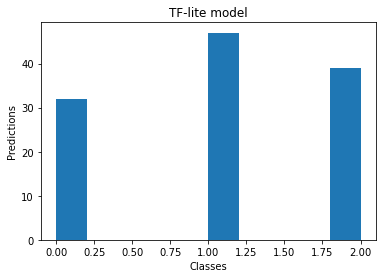

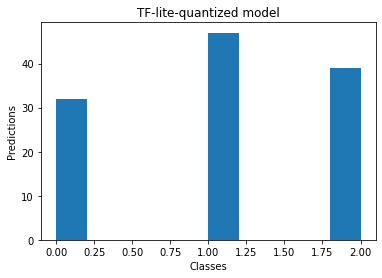

In [49]:
# Instantiate an interpreter for each model
gesture_model = tf.lite.Interpreter('models\Original Model/model.tflite')
gesture_model_quantized = tf.lite.Interpreter('models\Original Model/model_quantized.tflite')

# Allocate memory for each model
gesture_model.allocate_tensors()
gesture_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
gesture_model_input_index = gesture_model.get_input_details()[0]["index"]
gesture_model_output_index = gesture_model.get_output_details()[0]["index"]
gesture_model_quantized_input_index = gesture_model_quantized.get_input_details()[0]["index"]
gesture_model_quantized_output_index = \
gesture_model_quantized.get_output_details()[0]["index"]
# gesture_model_input_index,gesture_model_output_index
# Create arrays to store the results
gesture_model_predictions = []
gesture_model_quantized_predictions = []
av1=np.random.randn(5000,128,3,1)
av2=np.random.rand(1000,128,3,1)
x_test=np.concatenate((av1,av2))
# Run each model's interpreter for each value and store the results in arrays
for x_value in iter1:
#     print(len(x_value))
    # Create a 2D tensor wrapping the current x value
    x_value_tensor = tf.convert_to_tensor([x_value], dtype=np.float32)
#     print("answer2:::::::;;",x_value_tensor)
    # Write the value to the input tensor
    gesture_model.set_tensor(gesture_model_input_index, x_value_tensor)
    # Run inference
    gesture_model.invoke()
   # Read the prediction from the output tensor
    gesture_model_predictions.append(
    gesture_model.get_tensor(gesture_model_output_index)[0])
   # Do the same for the quantized model
    gesture_model_quantized.set_tensor(gesture_model_quantized_input_index, x_value_tensor)
    gesture_model_quantized.invoke()
    gesture_model_quantized_predictions.append(
    gesture_model_quantized.get_tensor(gesture_model_quantized_output_index)[0])
# print(gesture_model_predictions)
fig, ax = plt.subplots(1, 1)
avlite_class=np.argmax(gesture_model_predictions,axis=1)
ax.hist(avlite_class)
# Set title
ax.set_title("TF-lite model")
ax.set_xlabel('Classes')
ax.set_ylabel('Predictions')
plt.show()
avlitequantized_class=np.argmax(gesture_model_quantized_predictions,axis=1)
fig, ax = plt.subplots(1, 1)
plt.hist(avlitequantized_class)
ax.set_title("TF-lite-quantized model")
ax.set_xlabel('Classes')
ax.set_ylabel('Predictions')
plt.show()

**STOLEN MODEL ARCHITECTURE AND TRAINING**




In [12]:
Stolen_model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(
          8, (4, 3),
          padding="same",
          activation="relu",
          input_shape=(128, 3, 1)),  # output_shape=(batch, 128, 3, 8)
      tf.keras.layers.MaxPool2D((3, 3)),  # (batch, 42, 1, 8)
      tf.keras.layers.Dropout(0.1),  # (batch, 42, 1, 8)
      tf.keras.layers.Conv2D(32, (4, 1), padding="same",
                             activation="relu"),  # (batch, 42, 1, 16)
      tf.keras.layers.Conv2D(80, (4, 1), padding="same",
                             activation="relu"),  # (batch, 42, 1, 16)
      tf.keras.layers.MaxPool2D((3, 1), padding="same"),  # (batch, 14, 1, 16)
      tf.keras.layers.Dropout(0.5),  # (batch, 14, 1, 16)
      tf.keras.layers.Flatten(),  # (batch, 224)
      tf.keras.layers.Dense(32, activation="relu"),  # (batch, 16)
      tf.keras.layers.Dropout(0.5),  # (batch, 16)
      tf.keras.layers.Dense(3, activation="softmax")  # (batch, 4)
  ])

In [13]:
# model.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
Stolen_model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
# model.compile(optimizer="RMSprop",
#                 loss="sparse_categorical_crossentropy",
#                 metrics=["accuracy"])

In [19]:
Stolen_model.fit(contents_pickle[0],contents_pickle[1],epochs=20,steps_per_epoch=200)


Epoch 1/20
200/200 [==============================] - 8s 39ms/step - loss: 0.9634 - accuracy: 0.5214
Epoch 2/20
200/200 [==============================] - 7s 36ms/step - loss: 0.8977 - accuracy: 0.5869
Epoch 3/20
200/200 [==============================] - 8s 41ms/step - loss: 0.8656 - accuracy: 0.6103
Epoch 4/20
200/200 [==============================] - 8s 40ms/step - loss: 0.8358 - accuracy: 0.6266
Epoch 5/20
200/200 [==============================] - 8s 41ms/step - loss: 0.8096 - accuracy: 0.6427
Epoch 6/20
200/200 [==============================] - 8s 40ms/step - loss: 0.7923 - accuracy: 0.6507
Epoch 7/20
200/200 [==============================] - 8s 41ms/step - loss: 0.7807 - accuracy: 0.6575
Epoch 8/20
200/200 [==============================] - 8s 40ms/step - loss: 0.7734 - accuracy: 0.6601
Epoch 9/20
200/200 [==============================] - 8s 42ms/step - loss: 0.7585 - accuracy: 0.6656
Epoch 10/20
200/200 [==============================] - 8s 40ms/step - loss: 0.7517 - accura

**TESTING THE STOLEN MODEL USING ORIGINAL TEST DATA**


1. calling data loader function to load the test data, 
Getting the accuracy and loss of the stolen model
2. Storing the .h5 file of the stolen model
3. Plotting the results
4. Converting the stolen model to tflite and storing the .tflite file



In [5]:
from data_load import DataLoader
import argparse
def reshape_function(data, label):
  reshaped_data = tf.reshape(data, [-1, 3, 1])
  return reshaped_data, label
def load_data(train_data_path, valid_data_path, test_data_path, seq_length):
  data_loader = DataLoader(train_data_path,
                           valid_data_path,
                           test_data_path,
                           seq_length=seq_length)
  data_loader.format()
  return data_loader.train_len, data_loader.train_data, data_loader.valid_len, \
      data_loader.valid_data, data_loader.test_len, data_loader.test_data
seq_length = 128
train_len, train_data, valid_len, valid_data, test_len, test_data = \
load_data("data/train", "data/valid",
                  "data/test", seq_length)
def reshape_function(data, label):
  reshaped_data = tf.reshape(data, [-1, 3, 1])
  return reshaped_data, label
test_data = test_data.map(reshape_function)
test_data_batch = test_data.batch(500)
# loss, acc = Stolen_model.evaluate(test_data_batch)


train_data_length:4200
valid_data_length:55
test_data_length:59


In [75]:
tf.keras.models.save_model(
    Stolen_model, 'stolen_model.h5', overwrite=True, include_optimizer=True, save_format='h5',
    signatures=None, options=None)

120/120 [==============================] - 2s 18ms/step - loss: 0.6250 - accuracy: 0.7006


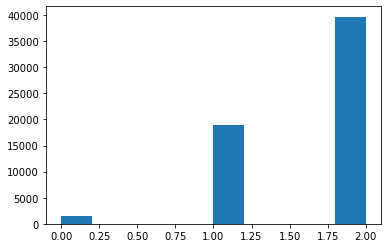

11

In [36]:
Stolen_model=tf.keras.models.load_model("stolen_model.h5")
loss, acc = Stolen_model.evaluate(train_data123)
av_out=Stolen_model.predict(train_data123)
# print(av_out)
# av.shape,av_out.shape
av_class=np.argmax(av_out,axis=1)
# av_class
# np.unique(av_class)
plt.hist(av_class)
plt.show()
len(Stolen_model.layers)

In [28]:
converter=tf.lite.TFLiteConverter.from_keras_model(Stolen_model)
tflite_modelstolen=converter.convert()

open("stolen_model.tflite","wb").write(tflite_modelstolen)

INFO:tensorflow:Assets written to: C:\Users\Abhyanth\AppData\Local\Temp\tmpiy4ou63i\assets


193316

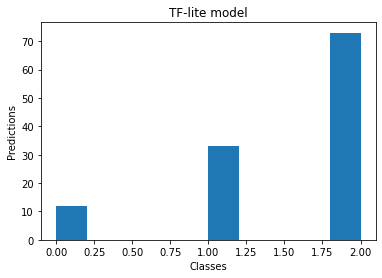

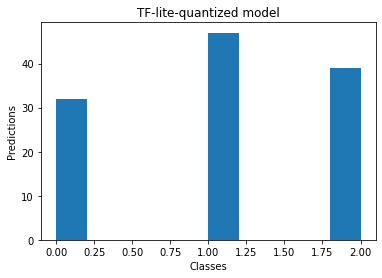

In [70]:
# Instantiate an interpreter for each model
gesture_model = tf.lite.Interpreter('stolen_model.tflite')
gesture_model_quantized = tf.lite.Interpreter('models\Original Model/model_quantized.tflite')

# Allocate memory for each model
gesture_model.allocate_tensors()
gesture_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
gesture_model_input_index = gesture_model.get_input_details()[0]["index"]
gesture_model_output_index = gesture_model.get_output_details()[0]["index"]
gesture_model_quantized_input_index = gesture_model_quantized.get_input_details()[0]["index"]
gesture_model_quantized_output_index = \
gesture_model_quantized.get_output_details()[0]["index"]
# gesture_model_input_index,gesture_model_output_index
# Create arrays to store the results
gesture_model_predictions = []
gesture_model_quantized_predictions = []
av1=np.random.randn(5000,128,3,1)
av2=np.random.rand(1000,128,3,1)
x_test=np.concatenate((av1,av2))
# Run each model's interpreter for each value and store the results in arrays
for x_value in iter1:
#     print(len(x_value))
    # Create a 2D tensor wrapping the current x value
    x_value_tensor = tf.convert_to_tensor([x_value], dtype=np.float32)
#     print("answer2:::::::;;",x_value_tensor)
    # Write the value to the input tensor
    gesture_model.set_tensor(gesture_model_input_index, x_value_tensor)
    # Run inference
    gesture_model.invoke()
   # Read the prediction from the output tensor
    gesture_model_predictions.append(
    gesture_model.get_tensor(gesture_model_output_index)[0])
   # Do the same for the quantized model
    gesture_model_quantized.set_tensor(gesture_model_quantized_input_index, x_value_tensor)
    gesture_model_quantized.invoke()
    gesture_model_quantized_predictions.append(
    gesture_model_quantized.get_tensor(gesture_model_quantized_output_index)[0])
# print(gesture_model_predictions)
fig, ax = plt.subplots(1, 1)
avlite_class=np.argmax(gesture_model_predictions,axis=1)
ax.hist(avlite_class)
# Set title
ax.set_title("TF-lite model")
ax.set_xlabel('Classes')
ax.set_ylabel('Predictions')
plt.show()
avlitequantized_class=np.argmax(gesture_model_quantized_predictions,axis=1)
fig, ax = plt.subplots(1, 1)
plt.hist(avlitequantized_class)
ax.set_title("TF-lite-quantized model")
ax.set_xlabel('Classes')
ax.set_ylabel('Predictions')
plt.show()

**DEFENCE**


1.   Converting the attack vector dataset to tesnor slice dataset to make similar to the original training dataset
2.   Preparing the training dataset for the defense model by combining the attack vectors and original training dataset
3. Storing the newely generated dataset in pickle format 



In [8]:
pickle_off = open("attack_vectors.pkl", 'rb')
contents_pickle = pickle.load(pickle_off)
contents_pickle[0].shape,contents_pickle[1].shape
av_training_dataset=tf.data.Dataset.from_tensor_slices((contents_pickle[0],contents_pickle[1]))

In [37]:
train_data = train_data.map(reshape_function)
orig_data=next(train_data.batch(9000).as_numpy_iterator())[0]
orig_labels=next(train_data.batch(9000).as_numpy_iterator())[1]
av_data=next(av_training_dataset.batch(9000).as_numpy_iterator())[0]
av_labels=next(av_training_dataset.batch(9000).as_numpy_iterator())[1]
orig_data.shape,orig_labels.shape,av_data.shape,av_labels.shape
new_av_lables = np.where( av_labels< 3, 3, av_labels)
final_data=np.concatenate([orig_data,av_data])
final_labels=np.concatenate([orig_labels,new_av_lables])
# final_data = np.repeat(final_data, 4,axis=0)
# final_labels = np.repeat(final_labels, 4)
final_data.shape,final_labels.shape

((17400, 128, 3, 1), (17400,))

In [22]:
file_new = open('Attack vectors_new dataset/new_training_data.pkl', 'wb')
pickle.dump([final_data,final_labels],file_new)
file_new.close()
pickle_off_new = open("Attack vectors_new dataset/new_training_data.pkl", 'rb')
contents_pickle_new = pickle.load(pickle_off_new)
contents_pickle_new[0].shape,contents_pickle_new[1].shape

((17400, 128, 3, 1), (17400,))

In [39]:
def_model = tf.keras.Sequential([
      tf.keras.layers.Bidirectional(
          tf.keras.layers.LSTM(22),
          input_shape=(seq_length, 3)),  # output_shape=(batch, 44)
      tf.keras.layers.Dense(4, activation="sigmoid")  # (batch, 4)
  ])

In [40]:
def_model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [25]:
def_model.fit(contents_pickle_new[0],contents_pickle_new[1],epochs=10,steps_per_epoch=200)



Epoch 1/10
200/200 [==============================] - 9s 37ms/step - loss: 0.5829 - accuracy: 0.7947
Epoch 2/10
200/200 [==============================] - 11s 57ms/step - loss: 0.2280 - accuracy: 0.9213
Epoch 3/10
200/200 [==============================] - 11s 56ms/step - loss: 0.1480 - accuracy: 0.9507
Epoch 4/10
200/200 [==============================] - 9s 45ms/step - loss: 0.1191 - accuracy: 0.9593
Epoch 5/10
200/200 [==============================] - 9s 47ms/step - loss: 0.0894 - accuracy: 0.9702
Epoch 6/10
200/200 [==============================] - 10s 48ms/step - loss: 0.0705 - accuracy: 0.9775
Epoch 7/10
200/200 [==============================] - 9s 47ms/step - loss: 0.0666 - accuracy: 0.9782
Epoch 8/10
200/200 [==============================] - 10s 48ms/step - loss: 0.0527 - accuracy: 0.9840
Epoch 9/10
200/200 [==============================] - 9s 47ms/step - loss: 0.0538 - accuracy: 0.9842
Epoch 10/10
200/200 [==============================] - 10s 48ms/step - loss: 0.0482 - a

In [49]:
loss, acc = def_model.evaluate(test_data_batch)

1/1 [==============================] - 0s 43ms/step - loss: 0.0721 - accuracy: 0.9831


In [61]:
test_labels = np.zeros(test_len)
idx=0
for data, label in test_data: 
    # pylint: disable=unused-variable
    test_labels[idx] = label.numpy()
    idx += 1
pred = np.argmax(def_model.predict(test_data_batch), axis=1)
confusion = tf.math.confusion_matrix(labels=test_labels,
                                       predictions=tf.constant(pred),
                                       num_classes=4)
confusion

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[32,  0,  0,  0],
       [ 1, 44,  1,  0],
       [ 0,  0, 40,  0],
       [ 0,  0,  0,  0]])>

In [28]:
np.unique(contents_pickle_new[1],return_counts=True)

(array([0, 1, 2, 3], dtype=int64),
 array([ 8800, 13200, 11600,  4800], dtype=int64))

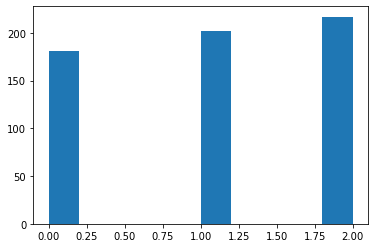

In [101]:
av_def1=np.random.randn(500,128,3)
av_def2=np.random.rand(100,128,3)
av_def=np.concatenate((av_def1,av_def2))
# check=test_data_batch
check=av_def
def_out=def_model.predict(check)
#print(av_out)
# av.shape,av_out.shape
def_class=np.argmax(def_out,axis=1)
l11=defense(def_class)
# av_class
# np.unique(av_class)

def defense(l10):
    for i in range(0,len(l10)):
        if l10[i]==3:
            l10[i]=np.random.randint(0,3)
    plt.hist(l10)
    plt.show()
    return l10

In [37]:
a=np.random.randn(1,200,3,1)
a

array([[[[-1.33342609e-02],
         [ 2.39988750e-01],
         [ 2.46115812e+00]],

        [[ 4.06180299e-01],
         [ 1.92120407e+00],
         [-2.00174440e+00]],

        [[-7.46827095e-01],
         [-6.61252917e-01],
         [-6.80536557e-01]],

        [[ 7.23036205e-01],
         [-1.86084554e-01],
         [ 3.47435205e-01]],

        [[-1.20393716e+00],
         [-2.04420562e+00],
         [-1.54258461e-01]],

        [[-7.67268355e-01],
         [-5.32328563e-02],
         [-1.91334976e+00]],

        [[-2.25751617e+00],
         [ 9.27179536e-02],
         [-3.08180989e-01]],

        [[ 1.23243056e+00],
         [-5.70353590e-01],
         [ 2.11682662e+00]],

        [[-2.13794426e+00],
         [ 5.28582371e-01],
         [ 8.41331524e-01]],

        [[ 1.64873108e-01],
         [-5.62674067e-01],
         [-1.02569655e+00]],

        [[ 3.80016602e-01],
         [-6.47250560e-01],
         [ 6.84208463e-01]],

        [[ 5.81561865e-01],
         [-8.54540229e-01]

In [14]:
a[0][0]

array([[ 0.15477881],
       [-0.64432544],
       [ 1.48847091]])

In [27]:
# for i in range(0,128):
#     for j in range(0,3):
#         print(a[0][i][j][0])

In [40]:
l1=[]
for i in range(0,200):
    for j in range(0,3):
        l1.append(a[0][i][j][0])

In [41]:
len(l1)

600

In [2]:
pickle_off = open("attack_vectors.pkl", 'rb')
contents_pickle = pickle.load(pickle_off)
contents_pickle[0].shape,contents_pickle[1].shape
av_training_dataset=tf.data.Dataset.from_tensor_slices((contents_pickle[0],contents_pickle[1]))

In [9]:
contents_pickle[1][3]

1

In [10]:
l1=[]
for i in range(0,128):
    for j in range(0,3):
        l1.append(contents_pickle[0][3][i][j][0])

In [31]:
test_data_batch

<BatchDataset shapes: ((None, 128, 3, 1), (None,)), types: (tf.float64, tf.int32)>

In [56]:
l1=[]
for iter1,j in test_data_batch:
    l1.append(j)

In [9]:
train_data123 = av_training_dataset.map(reshape_function)
train_data123=train_data123.batch(500)

In [10]:
zebra=len(train_data123)

In [11]:
a=np.random.randint(0,3)
a

2

In [18]:
count

8400

In [31]:
len(model.layers)

10

In [41]:
len(def_model.layers)

2

118

In [64]:
orig_data=next(test_data.batch(9000).as_numpy_iterator())[1]

1